[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [3]:

# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

# 랜덤 시드 고정
SEED=2021
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
# 케라스에서 불러오기
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# 피처 스케일링
X_train = X_train / 255.
X_test = X_test /255.


# 차원 추가
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [6]:
# 오토인코더 모델 정의
def Autoencoder():
  #model = Sequnetial()

  X = tf.keras.layers.Input(shape=[28,28,1])
  H = tf.keras.layers.Conv2D(32, kernel_size=5,activation='swish')(X)
  H = tf.keras.layers.MaxPool2D()(H)
  H = tf.keras.layers.Conv2D(32, kernel_size=5,activation='swish')(H)
  H = tf.keras.layers.MaxPool2D()(H)
  H = tf.keras.layers.Flatten()(H)

  #decode
  H = tf.keras.layers.Dense(20,activation='swish')(H)
  H = tf.keras.layers.Dense(4*4*32,activation='swish')(H)
  H = Reshape((4,4,32))(H)
  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(32,5,activation='swish')(H)
  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(1,5,activation='swish')(H)

  model = tf.keras.models.Model(X,H)
  model.compile(optimizer='adam',loss='mean_squared_error')

  return model

ae_model = Autoencoder()
ae_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1026

In [14]:
# 오토인코더 모델 학습
history = ae_model.fit(X_train, X_train, batch_size=64, epochs=20, verbose=1)

ae_images = ae_model.predict(X_test)
ae_images.shape

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0108
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0108
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0107
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0107
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0106
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0106
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0105
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0105
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0105
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0105


(10000, 28, 28, 1)

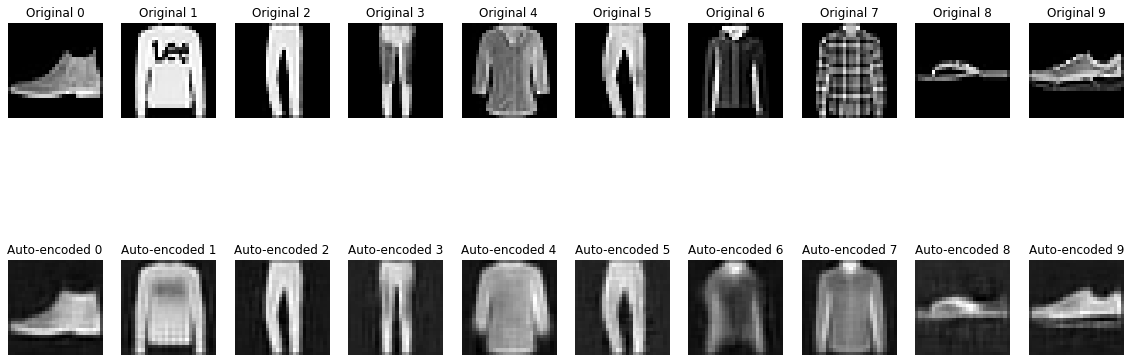

In [13]:
num = 10 
plt.figure(figsize=(20,8))

for i in range(10):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(X_test[i].reshape((28,28)), cmap='gray')
    plt.title("Original %s" % str(i))
    plt.axis('off')
    
    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(ae_images[i].reshape((28,28)), cmap='gray')
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')
    
plt.show()